[INFO] 2025-05-17 18:06:03 - <fbpinns.constants.Constants object at 0x78057901f170>
run: test
domain: <class 'fbpinns.domains.RectangularDomainND'>
domain_init_kwargs: {'xmin': array([0., 0.]), 'xmax': array([1., 1.])}
problem: <class 'fbpinns.problems.KovasznayFlow'>
problem_init_kwargs: {}
decomposition: <class 'fbpinns.decompositions.RectangularDecompositionND'>
decomposition_init_kwargs: {'subdomain_xs': [array([0. , 0.5, 1. ]), array([0. , 0.5, 1. ])], 'subdomain_ws': [array([0.6, 0.6, 0.6]), array([0.6, 0.6, 0.6])], 'unnorm': (0.0, 3.0)}
network: <class 'fbpinns.networks.StackedLegendreKAN'>
network_init_kwargs: {'dims': [2, 4, 3], 'degrees': [8, 8]}
n_steps: 1
scheduler: <class 'fbpinns.schedulers.AllActiveSchedulerND'>
scheduler_kwargs: {}
ns: ((200, 200),)
n_test: (200, 200)
sampler: grid
optimiser: <function adam at 0x7805787ccb80>
optimiser_kwargs: {'learning_rate': 0.0001}
seed: 0
summary_freq: 1000
test_freq: 1000
model_save_freq: 10000
show_figures: True
save_figures: Fal

ValueError: cannot reshape array of size 120000 into shape (200,200)

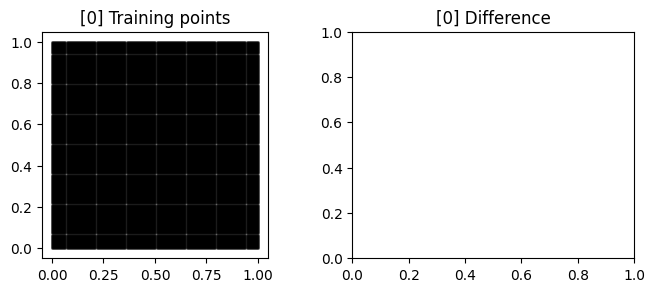

In [1]:
import numpy as np

from fbpinns.domains import RectangularDomainND
from fbpinns.decompositions import RectangularDecompositionND
from fbpinns.networks import FCN, ChebyshevKAN, StackedChebyshevKAN, StackedLegendreKAN
from fbpinns.schedulers import LineSchedulerRectangularND
from fbpinns.constants import Constants, get_subdomain_ws
from fbpinns.trainers import FBPINNTrainer, PINNTrainer
from fbpinns.problems import KovasznayFlow

x_min, x_max = 0., 1.
y_min, y_max = 0., 1.
subdomain_xs=[np.linspace(x_min, x_max, 3), np.linspace(y_min, y_max, 3)]
c = Constants(
    domain=RectangularDomainND,
    domain_init_kwargs = dict(
        xmin=np.array([x_min,y_min]),
        xmax=np.array([x_max,y_max])
        ),
    problem=KovasznayFlow,
    problem_init_kwargs = dict(
    ),
    decomposition=RectangularDecompositionND,
    decomposition_init_kwargs=dict(
        subdomain_xs=subdomain_xs,
        subdomain_ws=get_subdomain_ws(subdomain_xs, 1.2),
        unnorm=(0.,3.),
    ),
    # network=FCN,
    # network_init_kwargs = dict(
    #     layer_sizes = (2, 32, 3),
    # ),
    network=StackedLegendreKAN,# place a fully-connected network in each subdomain
    network_init_kwargs=dict(
        dims=[2, 4, 3],
        degrees=[8, 8]
    ),
    # scheduler = LineSchedulerRectangularND,
    # scheduler_kwargs = dict(
    #     point=[0.], iaxis=1,
    # ),
    optimiser_kwargs = dict(
        learning_rate=0.0001
        ),
    ns=((200,200),),
    n_test=(200,200),
    n_steps=1,
    clear_output=False,
    attention_tracking_kwargs=dict(
        eta_lr = 1e-2,
        gamma_decay = 0.99,
        out_dim=1,
        N=40000
        ),
)

# run = FBPINNTrainer(c)
run = PINNTrainer(c)
all_params = run.train()